# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
#set up empty lists to hold weather info
name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_num = 0
set_num = 1

print("Beginning Data Retrieval")     
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"

    # partial query URL
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    try:
        print(f"Processing Record {city_num} of Set {set_num} | {city}")
        
        response = requests.get(query_url + city).json()
        
        #add weather data for city into lists
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        name.append(response['name'])
        
        if city_num == 49:
            #reset record number to 0
            city_num = 0
            #increase set number by 1
            set_num += 1
        else:
            #increase record number by 1            
            city_num += 1
            
    except:
        print(f"City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | eydhafushi
Processing Record 1 of Set 1 | jiazi
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | alice springs
Processing Record 3 of Set 1 | hambantota
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | leningradskiy
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 7 of Set 1 | jacmel
Processing Record 8 of Set 1 | nyurba
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | salalah
Processing Record 14 of Set 1 | esperance
Processing Record 15 of Set 1 | saldanha
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | klak

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#combine city and weather data into dictionary
cities_dict = {
    "City": name,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
}
#create df
cities_df = pd.DataFrame(cities_dict)
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Eydhafushi,5.1033,73.0708,82.56,77,59,15.32,MV,1654194386
1,Jiazi,22.8779,116.0670,79.68,90,96,8.48,CN,1654194386
2,Alice Springs,-23.7000,133.8833,60.35,94,100,5.75,AU,1654194133
3,Hambantota,6.1241,81.1185,79.14,100,40,6.91,LK,1654194387
4,George Town,5.4112,100.3354,80.65,88,20,0.00,MY,1654194180


In [24]:
#save df to csv
cities_df.to_csv("output_data/cities_weather_output.csv")

In [25]:
#create summary table
cities_sum_df = cities_df[["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"]].describe()
cities_sum_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,19.923002,20.943911,66.803527,68.275132,56.082892,7.963862,1.654194e+09
std,33.536941,90.855195,16.566342,22.209772,36.500716,5.144640,9.009464e+01
min,-54.800000,-175.200000,24.820000,5.000000,0.000000,0.000000,1.654194e+09
25%,-8.063500,-60.966800,53.500000,55.500000,20.000000,4.460000,1.654194e+09
50%,24.687700,27.911600,69.100000,73.000000,64.000000,7.050000,1.654194e+09
75%,47.060650,102.016100,79.025000,85.000000,92.000000,10.320000,1.654195e+09
max,78.218600,179.316700,108.810000,100.000000,100.000000,30.560000,1.654195e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
#max humidity in cities df is 100, 
#so there are no cities with > 100% humidity that need to be removed from the df

In [27]:
#  Get the indices of cities that have humidity over 100%.
cities_df.loc[cities_df["Humidity"] > 100].index

Int64Index([], dtype='int64')

In [28]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#skipping since there are no outliers/cities with humidity over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

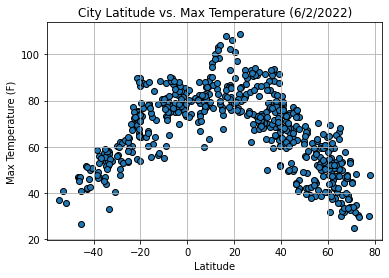

<Figure size 432x288 with 0 Axes>

In [39]:
plt.scatter(cities_df['Lat'],cities_df['Max Temp'], edgecolors='black')
plt.title("City Latitude vs. Max Temperature (6/2/2022)")
#setting x axis limits to be +-5 from the min and max latitude
plt.xlim([cities_sum_df.iloc[3,0]-5, cities_sum_df.iloc[7,0]+5])
plt.xlabel("Latitude")
#setting y axis limits to be +-5 from the min and max max temp
plt.ylim([cities_sum_df.iloc[3,2]-5, cities_sum_df.iloc[7,2]+5])
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

#save as png
plt.savefig("output_data/lat_temp_plot.png")

In [40]:
#add a sentence or two explaining what the code is analyzing


## Latitude vs. Humidity Plot

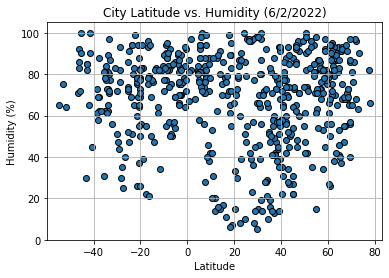

<Figure size 432x288 with 0 Axes>

In [41]:
plt.scatter(cities_df['Lat'],cities_df['Humidity'], edgecolors='black')
plt.title("City Latitude vs. Humidity (6/2/2022)")
#setting x axis limits to be +-5 from the min and max latitude
plt.xlim([cities_sum_df.iloc[3,0]-5, cities_sum_df.iloc[7,0]+5])
plt.xlabel("Latitude")
#setting y axis limits to be +-5 from the min and max humidity
plt.ylim([cities_sum_df.iloc[3,3]-5, cities_sum_df.iloc[7,3]+5])
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

#save as png
plt.savefig("output_data/lat_humidity_plot.png")

In [42]:
#add a sentence or two explaining what the code is analyzing


## Latitude vs. Cloudiness Plot

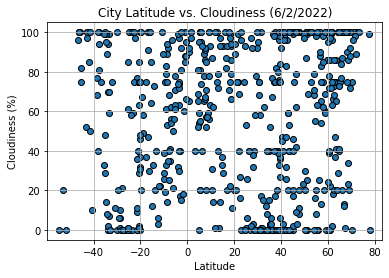

<Figure size 432x288 with 0 Axes>

In [43]:
plt.scatter(cities_df['Lat'],cities_df['Cloudiness'], edgecolors='black')
plt.title("City Latitude vs. Cloudiness (6/2/2022)")
#setting x axis limits to be +-5 from the min and max latitude
plt.xlim([cities_sum_df.iloc[3,0]-5, cities_sum_df.iloc[7,0]+5])
plt.xlabel("Latitude")
#setting y axis limits to be +-5 from the min and max cloudiness
plt.ylim([cities_sum_df.iloc[3,4]-5, cities_sum_df.iloc[7,4]+5])
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

#save as png
plt.savefig("output_data/lat_cloudiness_plot.png")

In [44]:
#add a sentence or two explaining what the code is analyzing


## Latitude vs. Wind Speed Plot

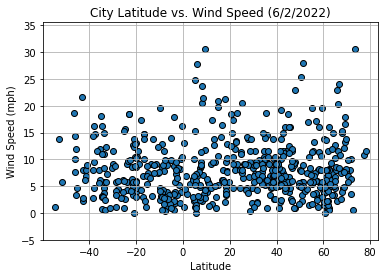

<Figure size 432x288 with 0 Axes>

In [45]:
plt.scatter(cities_df['Lat'],cities_df['Wind Speed'], edgecolors='black')
plt.title("City Latitude vs. Wind Speed (6/2/2022)")
#setting x axis limits to be +-5 from the min and max latitude
plt.xlim([cities_sum_df.iloc[3,0]-5, cities_sum_df.iloc[7,0]+5])
plt.xlabel("Latitude")
#setting y axis limits to be +-5 from the min and max wind speed
plt.ylim([cities_sum_df.iloc[3,5]-5, cities_sum_df.iloc[7,5]+5])
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

#save as png
plt.savefig("output_data/lat_wind_plot.png")

In [46]:
#add a sentence or two explaining what the code is analyzing


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


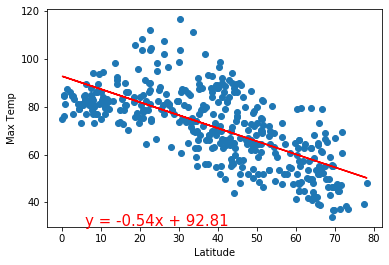

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


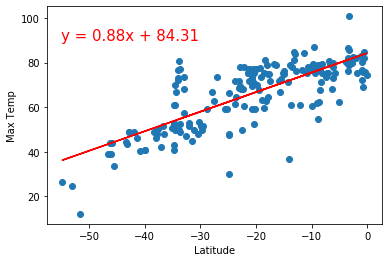

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


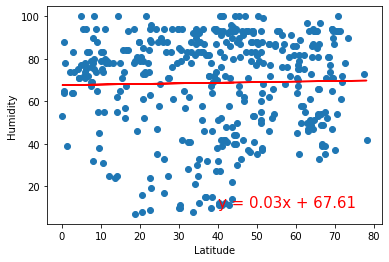

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


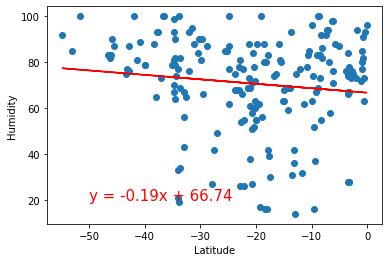

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


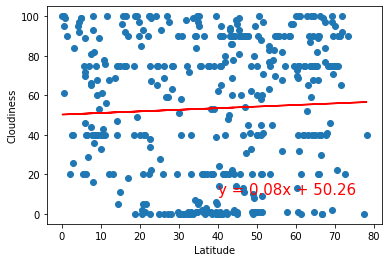

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


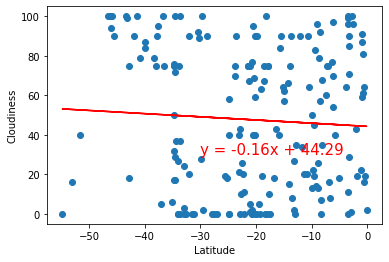

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


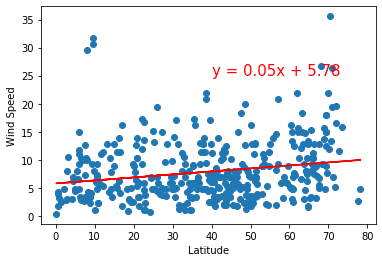

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


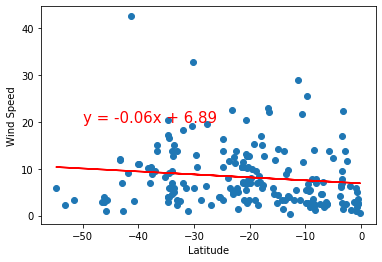